In [1]:
import numpy as np
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras import regularizers



Using TensorFlow backend.


In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
x = boston.data
x.shape

(506, 13)

In [5]:
y = boston.target

In [6]:
print(x)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [7]:
x[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [8]:
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [9]:
['{:f}'.format(x) for x in x[0]]


['0.006320',
 '18.000000',
 '2.310000',
 '0.000000',
 '0.538000',
 '6.575000',
 '65.200000',
 '4.090000',
 '1.000000',
 '296.000000',
 '15.300000',
 '396.900000',
 '4.980000']

In [10]:
type(boston.data)

numpy.ndarray

In [11]:
len(x[:,1])

506

In [12]:
x.shape

(506, 13)

In [13]:
# respounder = x[:,1]

In [14]:
# predictors = np.delete(x, 0, 1) 

In [15]:
# print(predictors)

In [16]:
# predictors.shape

In [17]:
# x=np.reshape(x, (-1,1))
# y=np.reshape(y, (-1,1))
# scaler = MinMaxScaler()
# print(scaler.fit(x))
# print(scaler.fit(y))
# xscale=scaler.transform(x)
# yscale=scaler.transform(y)

In [18]:
model = Sequential()
model.add(Dense(13, input_dim=13,use_bias=True, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu',use_bias=True, kernel_regularizer=regularizers.l1_l2(l1=0.5, l2=0.5)))
model.add(Dense(1,use_bias=True, activation='linear'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])


In [20]:
history = model.fit(x,y, epochs=1000, batch_size=50,  verbose=1, validation_split=0.2)


Instructions for updating:
Use tf.cast instead.
Train on 404 samples, validate on 102 samples
Epoch 1/1000
404/404 [==============================] - 0s 835us/step - loss: 1083.4342 - mean_squared_error: 1065.0552 - mean_absolute_error: 30.6617 - val_loss: 160.8600 - val_mean_squared_error: 142.6498 - val_mean_absolute_error: 9.7356
Epoch 2/1000
404/404 [==============================] - 0s 43us/step - loss: 304.9582 - mean_squared_error: 286.8176 - mean_absolute_error: 14.0755 - val_loss: 521.8040 - val_mean_squared_error: 503.7601 - val_mean_absolute_error: 19.7497
Epoch 3/1000
404/404 [==============================] - 0s 41us/step - loss: 158.0920 - mean_squared_error: 140.1129 - mean_absolute_error: 8.6242 - val_loss: 809.4439 - val_mean_squared_error: 791.5737 - val_mean_absolute_error: 26.4135
Epoch 4/1000
404/404 [==============================] - 0s 41us/step - loss: 159.4376 - mean_squared_error: 141.6506 - mean_absolute_error: 8.9893 - val_loss: 451.3990 - val_mean_squared_e

404/404 [==============================] - 0s 36us/step - loss: 68.7563 - mean_squared_error: 55.0695 - mean_absolute_error: 5.5807 - val_loss: 86.7346 - val_mean_squared_error: 73.0989 - val_mean_absolute_error: 6.6428
Epoch 35/1000
404/404 [==============================] - 0s 35us/step - loss: 67.0642 - mean_squared_error: 53.4639 - mean_absolute_error: 5.1056 - val_loss: 85.6759 - val_mean_squared_error: 72.1292 - val_mean_absolute_error: 6.5983
Epoch 36/1000
404/404 [==============================] - 0s 33us/step - loss: 66.5575 - mean_squared_error: 53.0439 - mean_absolute_error: 5.3391 - val_loss: 94.0359 - val_mean_squared_error: 80.5711 - val_mean_absolute_error: 7.1212
Epoch 37/1000
404/404 [==============================] - 0s 41us/step - loss: 65.4851 - mean_squared_error: 52.0503 - mean_absolute_error: 5.0537 - val_loss: 81.4890 - val_mean_squared_error: 68.0956 - val_mean_absolute_error: 6.3471
Epoch 38/1000
404/404 [==============================] - 0s 43us/step - loss: 

404/404 [==============================] - 0s 34us/step - loss: 51.7861 - mean_squared_error: 39.4456 - mean_absolute_error: 4.7114 - val_loss: 66.2503 - val_mean_squared_error: 53.9191 - val_mean_absolute_error: 5.7411
Epoch 70/1000
404/404 [==============================] - 0s 40us/step - loss: 50.1344 - mean_squared_error: 37.8031 - mean_absolute_error: 4.5538 - val_loss: 81.9323 - val_mean_squared_error: 69.6067 - val_mean_absolute_error: 6.7763
Epoch 71/1000
404/404 [==============================] - 0s 46us/step - loss: 49.6052 - mean_squared_error: 37.2875 - mean_absolute_error: 4.4719 - val_loss: 77.4351 - val_mean_squared_error: 65.1269 - val_mean_absolute_error: 6.3984
Epoch 72/1000
404/404 [==============================] - 0s 38us/step - loss: 49.5229 - mean_squared_error: 37.2190 - mean_absolute_error: 4.5451 - val_loss: 73.6247 - val_mean_squared_error: 61.3305 - val_mean_absolute_error: 6.1434
Epoch 73/1000
404/404 [==============================] - 0s 38us/step - loss: 

404/404 [==============================] - 0s 48us/step - loss: 45.7352 - mean_squared_error: 33.9413 - mean_absolute_error: 4.1664 - val_loss: 107.1054 - val_mean_squared_error: 95.3107 - val_mean_absolute_error: 8.3068
Epoch 105/1000
404/404 [==============================] - 0s 45us/step - loss: 57.6699 - mean_squared_error: 45.8807 - mean_absolute_error: 5.4497 - val_loss: 65.8532 - val_mean_squared_error: 54.0759 - val_mean_absolute_error: 5.8238
Epoch 106/1000
404/404 [==============================] - 0s 53us/step - loss: 49.5457 - mean_squared_error: 37.7720 - mean_absolute_error: 4.5420 - val_loss: 105.8768 - val_mean_squared_error: 94.1104 - val_mean_absolute_error: 8.0349
Epoch 107/1000
404/404 [==============================] - 0s 73us/step - loss: 45.9534 - mean_squared_error: 34.1959 - mean_absolute_error: 4.2243 - val_loss: 85.2112 - val_mean_squared_error: 73.4637 - val_mean_absolute_error: 6.7426
Epoch 108/1000
404/404 [==============================] - 0s 64us/step - 

Epoch 139/1000
404/404 [==============================] - 0s 39us/step - loss: 37.4327 - mean_squared_error: 26.0297 - mean_absolute_error: 3.7044 - val_loss: 96.9591 - val_mean_squared_error: 85.5609 - val_mean_absolute_error: 7.1884
Epoch 140/1000
404/404 [==============================] - 0s 44us/step - loss: 37.0597 - mean_squared_error: 25.6670 - mean_absolute_error: 3.6849 - val_loss: 97.9790 - val_mean_squared_error: 86.5931 - val_mean_absolute_error: 7.2138
Epoch 141/1000
404/404 [==============================] - 0s 37us/step - loss: 36.9357 - mean_squared_error: 25.5551 - mean_absolute_error: 3.6890 - val_loss: 102.0600 - val_mean_squared_error: 90.6848 - val_mean_absolute_error: 7.3736
Epoch 142/1000
404/404 [==============================] - 0s 46us/step - loss: 38.4869 - mean_squared_error: 27.1130 - mean_absolute_error: 3.9066 - val_loss: 90.4779 - val_mean_squared_error: 79.1098 - val_mean_absolute_error: 6.8035
Epoch 143/1000
404/404 [==============================] - 0

Epoch 174/1000
404/404 [==============================] - 0s 39us/step - loss: 35.3055 - mean_squared_error: 24.3128 - mean_absolute_error: 3.5429 - val_loss: 96.7663 - val_mean_squared_error: 85.7788 - val_mean_absolute_error: 7.2020
Epoch 175/1000
404/404 [==============================] - 0s 33us/step - loss: 33.7296 - mean_squared_error: 22.7500 - mean_absolute_error: 3.4615 - val_loss: 80.2785 - val_mean_squared_error: 69.3069 - val_mean_absolute_error: 6.4749
Epoch 176/1000
404/404 [==============================] - 0s 31us/step - loss: 35.6319 - mean_squared_error: 24.6623 - mean_absolute_error: 3.7685 - val_loss: 64.9684 - val_mean_squared_error: 54.0117 - val_mean_absolute_error: 5.8626
Epoch 177/1000
404/404 [==============================] - 0s 36us/step - loss: 38.4126 - mean_squared_error: 27.4611 - mean_absolute_error: 3.6316 - val_loss: 85.2458 - val_mean_squared_error: 74.2983 - val_mean_absolute_error: 6.6493
Epoch 178/1000
404/404 [==============================] - 0s

Epoch 209/1000
404/404 [==============================] - 0s 69us/step - loss: 31.1719 - mean_squared_error: 20.6467 - mean_absolute_error: 3.2840 - val_loss: 79.1770 - val_mean_squared_error: 68.6594 - val_mean_absolute_error: 6.4204
Epoch 210/1000
404/404 [==============================] - 0s 51us/step - loss: 31.4626 - mean_squared_error: 20.9519 - mean_absolute_error: 3.3614 - val_loss: 77.9371 - val_mean_squared_error: 67.4343 - val_mean_absolute_error: 6.2916
Epoch 211/1000
404/404 [==============================] - 0s 46us/step - loss: 31.0846 - mean_squared_error: 20.5864 - mean_absolute_error: 3.2774 - val_loss: 85.6941 - val_mean_squared_error: 75.2028 - val_mean_absolute_error: 6.6084
Epoch 212/1000
404/404 [==============================] - 0s 45us/step - loss: 35.7427 - mean_squared_error: 25.2547 - mean_absolute_error: 3.7816 - val_loss: 77.8762 - val_mean_squared_error: 67.4006 - val_mean_absolute_error: 6.2872
Epoch 213/1000
404/404 [==============================] - 0s

Epoch 244/1000
404/404 [==============================] - 0s 35us/step - loss: 29.8883 - mean_squared_error: 19.8272 - mean_absolute_error: 3.3179 - val_loss: 60.4427 - val_mean_squared_error: 50.3924 - val_mean_absolute_error: 5.5883
Epoch 245/1000
404/404 [==============================] - 0s 33us/step - loss: 29.4367 - mean_squared_error: 19.3920 - mean_absolute_error: 3.1713 - val_loss: 85.9186 - val_mean_squared_error: 75.8797 - val_mean_absolute_error: 6.7920
Epoch 246/1000
404/404 [==============================] - 0s 33us/step - loss: 37.9077 - mean_squared_error: 27.8767 - mean_absolute_error: 3.9779 - val_loss: 76.3439 - val_mean_squared_error: 66.3279 - val_mean_absolute_error: 6.2260
Epoch 247/1000
404/404 [==============================] - 0s 34us/step - loss: 33.0261 - mean_squared_error: 23.0125 - mean_absolute_error: 3.5601 - val_loss: 105.2336 - val_mean_squared_error: 95.2224 - val_mean_absolute_error: 7.9023
Epoch 248/1000
404/404 [==============================] - 0

Epoch 279/1000
404/404 [==============================] - 0s 37us/step - loss: 27.7739 - mean_squared_error: 18.1991 - mean_absolute_error: 3.1093 - val_loss: 63.1041 - val_mean_squared_error: 53.5398 - val_mean_absolute_error: 5.7922
Epoch 280/1000
404/404 [==============================] - 0s 40us/step - loss: 38.4763 - mean_squared_error: 28.9165 - mean_absolute_error: 3.6552 - val_loss: 59.3709 - val_mean_squared_error: 49.8081 - val_mean_absolute_error: 5.5247
Epoch 281/1000
404/404 [==============================] - 0s 36us/step - loss: 34.8127 - mean_squared_error: 25.2556 - mean_absolute_error: 3.9165 - val_loss: 57.4852 - val_mean_squared_error: 47.9460 - val_mean_absolute_error: 5.5172
Epoch 282/1000
404/404 [==============================] - 0s 35us/step - loss: 31.5785 - mean_squared_error: 22.0446 - mean_absolute_error: 3.2837 - val_loss: 85.6139 - val_mean_squared_error: 76.0838 - val_mean_absolute_error: 6.9258
Epoch 283/1000
404/404 [==============================] - 0s

Epoch 314/1000
404/404 [==============================] - 0s 32us/step - loss: 27.3835 - mean_squared_error: 18.2182 - mean_absolute_error: 3.1212 - val_loss: 75.4111 - val_mean_squared_error: 66.2538 - val_mean_absolute_error: 6.2980
Epoch 315/1000
404/404 [==============================] - 0s 33us/step - loss: 26.7002 - mean_squared_error: 17.5461 - mean_absolute_error: 2.9978 - val_loss: 73.9362 - val_mean_squared_error: 64.7901 - val_mean_absolute_error: 6.1710
Epoch 316/1000
404/404 [==============================] - 0s 31us/step - loss: 26.2303 - mean_squared_error: 17.0887 - mean_absolute_error: 2.9320 - val_loss: 66.2371 - val_mean_squared_error: 57.1026 - val_mean_absolute_error: 5.8639
Epoch 317/1000
404/404 [==============================] - 0s 33us/step - loss: 26.6074 - mean_squared_error: 17.4775 - mean_absolute_error: 2.9584 - val_loss: 67.1116 - val_mean_squared_error: 57.9883 - val_mean_absolute_error: 5.8386
Epoch 318/1000
404/404 [==============================] - 0s

Epoch 349/1000
404/404 [==============================] - 0s 29us/step - loss: 28.1982 - mean_squared_error: 19.4550 - mean_absolute_error: 3.0969 - val_loss: 66.0275 - val_mean_squared_error: 57.2947 - val_mean_absolute_error: 5.9232
Epoch 350/1000
404/404 [==============================] - 0s 30us/step - loss: 30.7995 - mean_squared_error: 22.0736 - mean_absolute_error: 3.2679 - val_loss: 84.0030 - val_mean_squared_error: 75.2782 - val_mean_absolute_error: 6.6907
Epoch 351/1000
404/404 [==============================] - 0s 28us/step - loss: 28.2373 - mean_squared_error: 19.5203 - mean_absolute_error: 3.2650 - val_loss: 70.2403 - val_mean_squared_error: 61.5363 - val_mean_absolute_error: 6.1126
Epoch 352/1000
404/404 [==============================] - 0s 33us/step - loss: 27.9599 - mean_squared_error: 19.2586 - mean_absolute_error: 3.1329 - val_loss: 81.3198 - val_mean_squared_error: 72.6224 - val_mean_absolute_error: 6.4536
Epoch 353/1000
404/404 [==============================] - 0s

Epoch 384/1000
404/404 [==============================] - 0s 37us/step - loss: 26.5775 - mean_squared_error: 18.2618 - mean_absolute_error: 2.9318 - val_loss: 68.6092 - val_mean_squared_error: 60.2975 - val_mean_absolute_error: 6.0793
Epoch 385/1000
404/404 [==============================] - 0s 41us/step - loss: 25.4212 - mean_squared_error: 17.1148 - mean_absolute_error: 3.0152 - val_loss: 66.4535 - val_mean_squared_error: 58.1562 - val_mean_absolute_error: 6.1760
Epoch 386/1000
404/404 [==============================] - 0s 40us/step - loss: 25.4431 - mean_squared_error: 17.1509 - mean_absolute_error: 2.8572 - val_loss: 71.7146 - val_mean_squared_error: 63.4302 - val_mean_absolute_error: 6.1770
Epoch 387/1000
404/404 [==============================] - 0s 35us/step - loss: 25.0976 - mean_squared_error: 16.8200 - mean_absolute_error: 2.9262 - val_loss: 65.8185 - val_mean_squared_error: 57.5494 - val_mean_absolute_error: 5.9022
Epoch 388/1000
404/404 [==============================] - 0s

Epoch 419/1000
404/404 [==============================] - 0s 32us/step - loss: 23.6571 - mean_squared_error: 15.8037 - mean_absolute_error: 2.8414 - val_loss: 70.6900 - val_mean_squared_error: 62.8452 - val_mean_absolute_error: 6.1046
Epoch 420/1000
404/404 [==============================] - 0s 33us/step - loss: 23.3693 - mean_squared_error: 15.5283 - mean_absolute_error: 2.7905 - val_loss: 62.8652 - val_mean_squared_error: 55.0326 - val_mean_absolute_error: 5.8447
Epoch 421/1000
404/404 [==============================] - 0s 36us/step - loss: 24.3699 - mean_squared_error: 16.5429 - mean_absolute_error: 2.8005 - val_loss: 78.0270 - val_mean_squared_error: 70.2017 - val_mean_absolute_error: 6.4737
Epoch 422/1000
404/404 [==============================] - 0s 34us/step - loss: 26.8032 - mean_squared_error: 18.9848 - mean_absolute_error: 3.1333 - val_loss: 55.3242 - val_mean_squared_error: 47.5176 - val_mean_absolute_error: 5.5812
Epoch 423/1000
404/404 [==============================] - 0s

Epoch 454/1000
404/404 [==============================] - 0s 36us/step - loss: 23.6105 - mean_squared_error: 16.1464 - mean_absolute_error: 2.9511 - val_loss: 62.7738 - val_mean_squared_error: 55.3217 - val_mean_absolute_error: 5.8892
Epoch 455/1000
404/404 [==============================] - 0s 35us/step - loss: 23.0465 - mean_squared_error: 15.5996 - mean_absolute_error: 2.7678 - val_loss: 85.3186 - val_mean_squared_error: 77.8733 - val_mean_absolute_error: 6.8587
Epoch 456/1000
404/404 [==============================] - 0s 33us/step - loss: 24.9035 - mean_squared_error: 17.4664 - mean_absolute_error: 3.0209 - val_loss: 64.6772 - val_mean_squared_error: 57.2498 - val_mean_absolute_error: 6.0389
Epoch 457/1000
404/404 [==============================] - 0s 34us/step - loss: 22.6791 - mean_squared_error: 15.2552 - mean_absolute_error: 2.8285 - val_loss: 74.0778 - val_mean_squared_error: 66.6576 - val_mean_absolute_error: 6.2866
Epoch 458/1000
404/404 [==============================] - 0s

Epoch 489/1000
404/404 [==============================] - 0s 35us/step - loss: 27.5781 - mean_squared_error: 20.4510 - mean_absolute_error: 3.2510 - val_loss: 60.0150 - val_mean_squared_error: 52.9006 - val_mean_absolute_error: 5.8234
Epoch 490/1000
404/404 [==============================] - 0s 37us/step - loss: 23.1879 - mean_squared_error: 16.0761 - mean_absolute_error: 2.8573 - val_loss: 72.3576 - val_mean_squared_error: 65.2532 - val_mean_absolute_error: 6.2215
Epoch 491/1000
404/404 [==============================] - 0s 34us/step - loss: 22.6861 - mean_squared_error: 15.5880 - mean_absolute_error: 2.7652 - val_loss: 67.3413 - val_mean_squared_error: 60.2473 - val_mean_absolute_error: 5.9679
Epoch 492/1000
404/404 [==============================] - 0s 34us/step - loss: 22.1909 - mean_squared_error: 15.1008 - mean_absolute_error: 2.7932 - val_loss: 62.4135 - val_mean_squared_error: 55.3314 - val_mean_absolute_error: 5.8293
Epoch 493/1000
404/404 [==============================] - 0s

Epoch 524/1000
404/404 [==============================] - 0s 36us/step - loss: 22.0146 - mean_squared_error: 15.2326 - mean_absolute_error: 2.7569 - val_loss: 54.9670 - val_mean_squared_error: 48.1883 - val_mean_absolute_error: 5.4634
Epoch 525/1000
404/404 [==============================] - 0s 35us/step - loss: 21.6334 - mean_squared_error: 14.8583 - mean_absolute_error: 2.7502 - val_loss: 58.9314 - val_mean_squared_error: 52.1630 - val_mean_absolute_error: 5.6292
Epoch 526/1000
404/404 [==============================] - 0s 34us/step - loss: 21.5032 - mean_squared_error: 14.7375 - mean_absolute_error: 2.7207 - val_loss: 59.0485 - val_mean_squared_error: 52.2877 - val_mean_absolute_error: 5.6870
Epoch 527/1000
404/404 [==============================] - 0s 37us/step - loss: 22.0584 - mean_squared_error: 15.3029 - mean_absolute_error: 2.7388 - val_loss: 60.3088 - val_mean_squared_error: 53.5574 - val_mean_absolute_error: 5.7259
Epoch 528/1000
404/404 [==============================] - 0s

Epoch 559/1000
404/404 [==============================] - 0s 29us/step - loss: 21.1842 - mean_squared_error: 14.7060 - mean_absolute_error: 2.6909 - val_loss: 54.5277 - val_mean_squared_error: 48.0568 - val_mean_absolute_error: 5.5643
Epoch 560/1000
404/404 [==============================] - 0s 32us/step - loss: 21.1568 - mean_squared_error: 14.6875 - mean_absolute_error: 2.7459 - val_loss: 56.2068 - val_mean_squared_error: 49.7421 - val_mean_absolute_error: 5.5386
Epoch 561/1000
404/404 [==============================] - 0s 31us/step - loss: 20.9201 - mean_squared_error: 14.4596 - mean_absolute_error: 2.7173 - val_loss: 53.7146 - val_mean_squared_error: 47.2606 - val_mean_absolute_error: 5.5917
Epoch 562/1000
404/404 [==============================] - 0s 31us/step - loss: 22.1821 - mean_squared_error: 15.7320 - mean_absolute_error: 2.7512 - val_loss: 66.8196 - val_mean_squared_error: 60.3720 - val_mean_absolute_error: 6.0214
Epoch 563/1000
404/404 [==============================] - 0s

Epoch 594/1000
404/404 [==============================] - 0s 34us/step - loss: 20.4894 - mean_squared_error: 14.3042 - mean_absolute_error: 2.6699 - val_loss: 77.3918 - val_mean_squared_error: 71.1994 - val_mean_absolute_error: 6.6710
Epoch 595/1000
404/404 [==============================] - 0s 34us/step - loss: 26.6742 - mean_squared_error: 20.4874 - mean_absolute_error: 3.3609 - val_loss: 53.4245 - val_mean_squared_error: 47.2452 - val_mean_absolute_error: 5.6226
Epoch 596/1000
404/404 [==============================] - 0s 32us/step - loss: 24.0126 - mean_squared_error: 17.8329 - mean_absolute_error: 3.0608 - val_loss: 70.0112 - val_mean_squared_error: 63.8309 - val_mean_absolute_error: 6.2044
Epoch 597/1000
404/404 [==============================] - 0s 33us/step - loss: 25.0728 - mean_squared_error: 18.8964 - mean_absolute_error: 3.0907 - val_loss: 71.1917 - val_mean_squared_error: 65.0212 - val_mean_absolute_error: 6.1083
Epoch 598/1000
404/404 [==============================] - 0s

Epoch 629/1000
404/404 [==============================] - 0s 33us/step - loss: 20.4464 - mean_squared_error: 14.5161 - mean_absolute_error: 2.7476 - val_loss: 50.1426 - val_mean_squared_error: 44.2172 - val_mean_absolute_error: 5.3404
Epoch 630/1000
404/404 [==============================] - 0s 31us/step - loss: 20.2986 - mean_squared_error: 14.3726 - mean_absolute_error: 2.6637 - val_loss: 57.5828 - val_mean_squared_error: 51.6605 - val_mean_absolute_error: 5.6431
Epoch 631/1000
404/404 [==============================] - 0s 32us/step - loss: 20.2238 - mean_squared_error: 14.3059 - mean_absolute_error: 2.6415 - val_loss: 49.7219 - val_mean_squared_error: 43.8112 - val_mean_absolute_error: 5.3748
Epoch 632/1000
404/404 [==============================] - 0s 33us/step - loss: 20.5449 - mean_squared_error: 14.6362 - mean_absolute_error: 2.6627 - val_loss: 59.3275 - val_mean_squared_error: 53.4212 - val_mean_absolute_error: 5.6855
Epoch 633/1000
404/404 [==============================] - 0s

Epoch 664/1000
404/404 [==============================] - 0s 28us/step - loss: 19.6711 - mean_squared_error: 13.9594 - mean_absolute_error: 2.6251 - val_loss: 52.4445 - val_mean_squared_error: 46.7388 - val_mean_absolute_error: 5.4207
Epoch 665/1000
404/404 [==============================] - 0s 27us/step - loss: 19.8982 - mean_squared_error: 14.1941 - mean_absolute_error: 2.7136 - val_loss: 46.2281 - val_mean_squared_error: 40.5290 - val_mean_absolute_error: 5.2512
Epoch 666/1000
404/404 [==============================] - 0s 29us/step - loss: 20.1280 - mean_squared_error: 14.4296 - mean_absolute_error: 2.7242 - val_loss: 52.8897 - val_mean_squared_error: 47.1965 - val_mean_absolute_error: 5.4849
Epoch 667/1000
404/404 [==============================] - 0s 34us/step - loss: 20.1689 - mean_squared_error: 14.4772 - mean_absolute_error: 2.6636 - val_loss: 50.4375 - val_mean_squared_error: 44.7463 - val_mean_absolute_error: 5.3390
Epoch 668/1000
404/404 [==============================] - 0s

Epoch 699/1000
404/404 [==============================] - 0s 35us/step - loss: 22.7947 - mean_squared_error: 17.2714 - mean_absolute_error: 3.0412 - val_loss: 46.5398 - val_mean_squared_error: 41.0212 - val_mean_absolute_error: 5.1002
Epoch 700/1000
404/404 [==============================] - 0s 31us/step - loss: 22.1824 - mean_squared_error: 16.6702 - mean_absolute_error: 2.8448 - val_loss: 58.7687 - val_mean_squared_error: 53.2597 - val_mean_absolute_error: 5.7560
Epoch 701/1000
404/404 [==============================] - 0s 37us/step - loss: 20.2798 - mean_squared_error: 14.7760 - mean_absolute_error: 2.6996 - val_loss: 49.7118 - val_mean_squared_error: 44.2153 - val_mean_absolute_error: 5.3499
Epoch 702/1000
404/404 [==============================] - 0s 32us/step - loss: 20.4017 - mean_squared_error: 14.9063 - mean_absolute_error: 2.7382 - val_loss: 46.2553 - val_mean_squared_error: 40.7661 - val_mean_absolute_error: 5.1420
Epoch 703/1000
404/404 [==============================] - 0s

Epoch 734/1000
404/404 [==============================] - 0s 30us/step - loss: 36.6879 - mean_squared_error: 31.3780 - mean_absolute_error: 3.9996 - val_loss: 60.9789 - val_mean_squared_error: 55.6876 - val_mean_absolute_error: 6.1755
Epoch 735/1000
404/404 [==============================] - 0s 36us/step - loss: 31.8961 - mean_squared_error: 26.6047 - mean_absolute_error: 3.6612 - val_loss: 77.1062 - val_mean_squared_error: 71.8107 - val_mean_absolute_error: 6.7529
Epoch 736/1000
404/404 [==============================] - 0s 37us/step - loss: 19.9846 - mean_squared_error: 14.6959 - mean_absolute_error: 2.7931 - val_loss: 41.5199 - val_mean_squared_error: 36.2343 - val_mean_absolute_error: 4.8230
Epoch 737/1000
404/404 [==============================] - 0s 34us/step - loss: 22.0337 - mean_squared_error: 16.7464 - mean_absolute_error: 2.9629 - val_loss: 41.2904 - val_mean_squared_error: 36.0109 - val_mean_absolute_error: 4.8715
Epoch 738/1000
404/404 [==============================] - 0s

Epoch 769/1000
404/404 [==============================] - 0s 33us/step - loss: 21.0098 - mean_squared_error: 15.8554 - mean_absolute_error: 2.8566 - val_loss: 60.0537 - val_mean_squared_error: 54.8979 - val_mean_absolute_error: 5.6733
Epoch 770/1000
404/404 [==============================] - 0s 31us/step - loss: 20.5924 - mean_squared_error: 15.4341 - mean_absolute_error: 2.8902 - val_loss: 51.1964 - val_mean_squared_error: 46.0472 - val_mean_absolute_error: 5.2832
Epoch 771/1000
404/404 [==============================] - 0s 35us/step - loss: 19.9830 - mean_squared_error: 14.8364 - mean_absolute_error: 2.6848 - val_loss: 57.5603 - val_mean_squared_error: 52.4148 - val_mean_absolute_error: 5.6258
Epoch 772/1000
404/404 [==============================] - 0s 32us/step - loss: 19.3582 - mean_squared_error: 14.2159 - mean_absolute_error: 2.7250 - val_loss: 48.1335 - val_mean_squared_error: 42.9959 - val_mean_absolute_error: 5.2199
Epoch 773/1000
404/404 [==============================] - 0s

Epoch 804/1000
404/404 [==============================] - 0s 32us/step - loss: 20.3351 - mean_squared_error: 15.3614 - mean_absolute_error: 2.7862 - val_loss: 48.5903 - val_mean_squared_error: 43.6237 - val_mean_absolute_error: 5.4119
Epoch 805/1000
404/404 [==============================] - 0s 34us/step - loss: 20.3918 - mean_squared_error: 15.4257 - mean_absolute_error: 2.7578 - val_loss: 53.7001 - val_mean_squared_error: 48.7330 - val_mean_absolute_error: 5.3922
Epoch 806/1000
404/404 [==============================] - 0s 31us/step - loss: 19.5620 - mean_squared_error: 14.6004 - mean_absolute_error: 2.7502 - val_loss: 48.6824 - val_mean_squared_error: 43.7268 - val_mean_absolute_error: 5.2626
Epoch 807/1000
404/404 [==============================] - 0s 35us/step - loss: 18.1344 - mean_squared_error: 13.1799 - mean_absolute_error: 2.5355 - val_loss: 54.0469 - val_mean_squared_error: 49.0947 - val_mean_absolute_error: 5.4276
Epoch 808/1000
404/404 [==============================] - 0s

Epoch 839/1000
404/404 [==============================] - 0s 34us/step - loss: 18.2489 - mean_squared_error: 13.4159 - mean_absolute_error: 2.6135 - val_loss: 44.4903 - val_mean_squared_error: 39.6609 - val_mean_absolute_error: 5.0575
Epoch 840/1000
404/404 [==============================] - 0s 32us/step - loss: 18.5473 - mean_squared_error: 13.7169 - mean_absolute_error: 2.6236 - val_loss: 48.4167 - val_mean_squared_error: 43.5834 - val_mean_absolute_error: 5.1160
Epoch 841/1000
404/404 [==============================] - 0s 35us/step - loss: 18.3639 - mean_squared_error: 13.5333 - mean_absolute_error: 2.6233 - val_loss: 48.8051 - val_mean_squared_error: 43.9765 - val_mean_absolute_error: 5.2392
Epoch 842/1000
404/404 [==============================] - 0s 34us/step - loss: 18.4048 - mean_squared_error: 13.5757 - mean_absolute_error: 2.5699 - val_loss: 48.3684 - val_mean_squared_error: 43.5405 - val_mean_absolute_error: 5.2014
Epoch 843/1000
404/404 [==============================] - 0s

Epoch 874/1000
404/404 [==============================] - 0s 33us/step - loss: 19.1483 - mean_squared_error: 14.4688 - mean_absolute_error: 2.6648 - val_loss: 51.4271 - val_mean_squared_error: 46.7450 - val_mean_absolute_error: 5.3109
Epoch 875/1000
404/404 [==============================] - 0s 34us/step - loss: 18.3913 - mean_squared_error: 13.7139 - mean_absolute_error: 2.6521 - val_loss: 46.9891 - val_mean_squared_error: 42.3175 - val_mean_absolute_error: 5.2540
Epoch 876/1000
404/404 [==============================] - 0s 33us/step - loss: 19.6444 - mean_squared_error: 14.9719 - mean_absolute_error: 2.7244 - val_loss: 55.5696 - val_mean_squared_error: 50.8960 - val_mean_absolute_error: 5.4965
Epoch 877/1000
404/404 [==============================] - 0s 30us/step - loss: 20.1213 - mean_squared_error: 15.4520 - mean_absolute_error: 2.7020 - val_loss: 56.9727 - val_mean_squared_error: 52.3039 - val_mean_absolute_error: 5.6018
Epoch 878/1000
404/404 [==============================] - 0s

Epoch 909/1000
404/404 [==============================] - 0s 37us/step - loss: 27.6863 - mean_squared_error: 23.0926 - mean_absolute_error: 3.6109 - val_loss: 41.5127 - val_mean_squared_error: 36.9264 - val_mean_absolute_error: 4.9548
Epoch 910/1000
404/404 [==============================] - 0s 31us/step - loss: 27.0513 - mean_squared_error: 22.4639 - mean_absolute_error: 3.3675 - val_loss: 60.4878 - val_mean_squared_error: 55.9041 - val_mean_absolute_error: 5.8243
Epoch 911/1000
404/404 [==============================] - 0s 33us/step - loss: 24.3570 - mean_squared_error: 19.7687 - mean_absolute_error: 3.1183 - val_loss: 67.2919 - val_mean_squared_error: 62.6871 - val_mean_absolute_error: 6.0634
Epoch 912/1000
404/404 [==============================] - 0s 31us/step - loss: 22.3968 - mean_squared_error: 17.7982 - mean_absolute_error: 3.1081 - val_loss: 46.4889 - val_mean_squared_error: 41.9062 - val_mean_absolute_error: 5.0846
Epoch 913/1000
404/404 [==============================] - 0s

Epoch 944/1000
404/404 [==============================] - 0s 34us/step - loss: 17.3279 - mean_squared_error: 12.8722 - mean_absolute_error: 2.5430 - val_loss: 43.9865 - val_mean_squared_error: 39.5347 - val_mean_absolute_error: 5.1562
Epoch 945/1000
404/404 [==============================] - 0s 27us/step - loss: 17.5801 - mean_squared_error: 13.1306 - mean_absolute_error: 2.5611 - val_loss: 52.7856 - val_mean_squared_error: 48.3328 - val_mean_absolute_error: 5.4890
Epoch 946/1000
404/404 [==============================] - 0s 30us/step - loss: 18.3641 - mean_squared_error: 13.9137 - mean_absolute_error: 2.7046 - val_loss: 44.2373 - val_mean_squared_error: 39.7916 - val_mean_absolute_error: 5.0873
Epoch 947/1000
404/404 [==============================] - 0s 33us/step - loss: 18.0030 - mean_squared_error: 13.5568 - mean_absolute_error: 2.6334 - val_loss: 39.8034 - val_mean_squared_error: 35.3607 - val_mean_absolute_error: 4.8679
Epoch 948/1000
404/404 [==============================] - 0s

Epoch 979/1000
404/404 [==============================] - 0s 32us/step - loss: 17.2864 - mean_squared_error: 12.9050 - mean_absolute_error: 2.5332 - val_loss: 37.8294 - val_mean_squared_error: 33.4472 - val_mean_absolute_error: 4.6831
Epoch 980/1000
404/404 [==============================] - 0s 32us/step - loss: 17.4755 - mean_squared_error: 13.0952 - mean_absolute_error: 2.5796 - val_loss: 40.5799 - val_mean_squared_error: 36.2008 - val_mean_absolute_error: 4.8685
Epoch 981/1000
404/404 [==============================] - 0s 32us/step - loss: 17.6944 - mean_squared_error: 13.3140 - mean_absolute_error: 2.5772 - val_loss: 44.8465 - val_mean_squared_error: 40.4686 - val_mean_absolute_error: 5.1099
Epoch 982/1000
404/404 [==============================] - 0s 37us/step - loss: 17.3955 - mean_squared_error: 13.0185 - mean_absolute_error: 2.5497 - val_loss: 41.5879 - val_mean_squared_error: 37.2119 - val_mean_absolute_error: 4.9779
Epoch 983/1000
404/404 [==============================] - 0s

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])


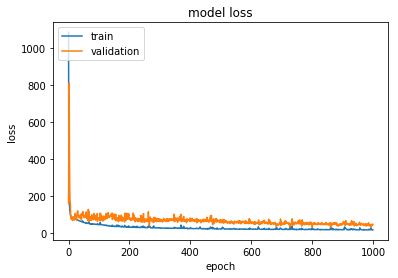

In [21]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
Xnew = np.array([['0.006320','18.000000',
 '2.310000',
 '0.000000',
 '0.538000',
 '6.575000',
 '65.200000',
 '4.090000',
 '1.000000',
 '296.000000',
 '15.300000',
 '396.900000',
 '4.980000']])
ynew=model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=['0.006320' '18.000000' '2.310000' '0.000000' '0.538000' '6.575000'
 '65.200000' '4.090000' '1.000000' '296.000000' '15.300000' '396.900000'
 '4.980000'], Predicted=[32.930813]
